### Active learning with the MNIST dataset

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
number_of_training_data = 500
number_of_test_data = 50

In [28]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [29]:
print("train_x shape : ", train_x.shape)
print("train_y shape : ", train_y.shape)
print("test_x shape : ", test_x.shape)
print("test_y shape : ", test_y.shape)

train_x shape :  (60000, 28, 28)
train_y shape :  (60000,)
test_x shape :  (10000, 28, 28)
test_y shape :  (10000,)


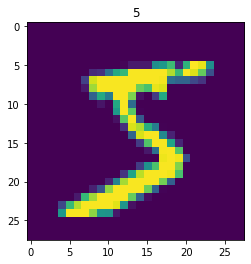

In [30]:
plt.imshow(train_x[0])
plt.title(train_y[0])
plt.show()

### Use a subset of the MNIST dataset (1000) and normalize:

In [31]:
X = train_x[:number_of_training_data] / 255
Y = train_y[:number_of_training_data]
X_test = test_x[:number_of_test_data] / 255
Y_test = test_y[:number_of_test_data]

print("X shape : ", X.shape)
print("Y shape : ", Y.shape)
print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)

X shape :  (500, 28, 28)
Y shape :  (500,)
X_test shape :  (50, 28, 28)
Y_test shape :  (50,)


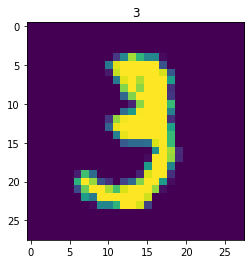

In [32]:
plt.imshow(X[10])
plt.title(Y[10])
plt.show()

### Plot distribution of the subset:

In [33]:
count_labels = [len(Y[Y==label]) for label in np.unique(Y)]
print(count_labels)

[50, 66, 52, 50, 52, 39, 45, 52, 39, 55]


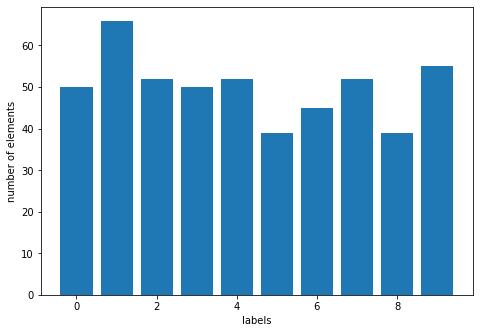

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.unique(Y),count_labels)
plt.xlabel('labels')
plt.ylabel('number of elements')
plt.show()

### Prepare data and build model:

In [35]:
# one hot encoding
Y_enc = np.zeros((len(Y), 10), dtype='int')
print(Y_enc.shape)
for i, y in enumerate(Y):
    Y_enc[i, y] = 1
    
Y_test_enc = np.zeros((len(Y_test), 10), dtype='int')
print(Y_test_enc.shape)
for i, y in enumerate(Y_test):
    Y_test_enc[i, y] = 1

(500, 10)
(50, 10)


In [36]:
X = X.reshape(-1, 28, 28, 1)
print(X.shape)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_test.shape)

(500, 28, 28, 1)
(50, 28, 28, 1)


In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='acc')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [38]:
history = model.fit(X, Y_enc, epochs=20, batch_size=256, validation_data=(X_test, Y_test_enc))

Epoch 1/20
2/2 [==============================] - 0s 158ms/step - loss: 2.3172 - acc: 0.1300 - val_loss: 2.2661 - val_acc: 0.1400
Epoch 2/20
2/2 [==============================] - 0s 93ms/step - loss: 2.2183 - acc: 0.2500 - val_loss: 2.1870 - val_acc: 0.3800
Epoch 3/20
2/2 [==============================] - 0s 87ms/step - loss: 2.1560 - acc: 0.3200 - val_loss: 2.1011 - val_acc: 0.5200
Epoch 4/20
2/2 [==============================] - 0s 82ms/step - loss: 2.0432 - acc: 0.4520 - val_loss: 2.0014 - val_acc: 0.5800
Epoch 5/20
2/2 [==============================] - 0s 80ms/step - loss: 1.9560 - acc: 0.5060 - val_loss: 1.8822 - val_acc: 0.7200
Epoch 6/20
2/2 [==============================] - 0s 87ms/step - loss: 1.8499 - acc: 0.5760 - val_loss: 1.7391 - val_acc: 0.7800
Epoch 7/20
2/2 [==============================] - 0s 83ms/step - loss: 1.7181 - acc: 0.6240 - val_loss: 1.5764 - val_acc: 0.8400
Epoch 8/20
2/2 [==============================] - 0s 83ms/step - loss: 1.5413 - acc: 0.6840 - va

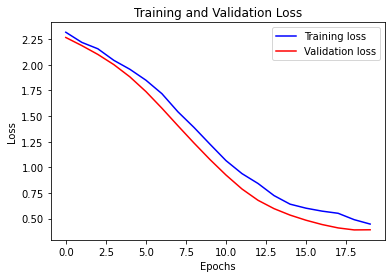

In [39]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

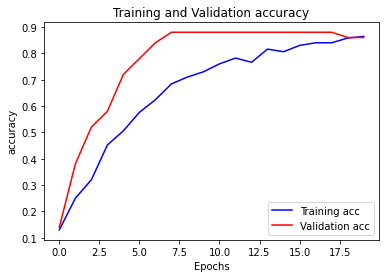

In [40]:
def visualize_loss(history, title):
    loss = history.history["acc"]
    val_loss = history.history["val_acc"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training acc")
    plt.plot(epochs, val_loss, "r", label="Validation acc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation accuracy")

In [41]:
X_not_labeled = train_x[number_of_training_data:] / 255
X_not_labeled = X_not_labeled.reshape(-1, 28, 28, 1)
Y_not_labeled = train_y[number_of_training_data:]


In [42]:
y_pred = model.predict(X_not_labeled)
print(y_pred.shape)

(59500, 10)


In [43]:
y_pred_ = np.argmax(y_pred, axis=1)
print("accuracy on unseen data : ", (np.sum(y_pred_ == Y_not_labeled) / len(Y_not_labeled))*100)

accuracy on unseen data :  81.47563025210084


In [44]:
print(np.argmax(y_pred[:10], axis=1))
li = np.argmax(y_pred[:10], axis=1)

[7 8 8 8 3 7 2 1 1 8]


In [45]:
i = 0
confidence_threshold = 0.9
for elem in li:
    if y_pred[i, elem] >= confidence_threshold:
        print("high confidence: {}, prediction: {}, true: {},".format(y_pred[i, elem], elem, Y_not_labeled[i]))
    else:
        print("low confidence: {}, prediction: {}, true: {},".format(y_pred[i, elem], elem, Y_not_labeled[i]))
    i+=1

low confidence: 0.8279579877853394, prediction: 7, true: 3,
low confidence: 0.6358433961868286, prediction: 8, true: 9,
low confidence: 0.29702797532081604, prediction: 8, true: 5,
low confidence: 0.7320128679275513, prediction: 8, true: 8,
low confidence: 0.8257227540016174, prediction: 3, true: 5,
high confidence: 0.9939318895339966, prediction: 7, true: 7,
low confidence: 0.391191691160202, prediction: 2, true: 6,
low confidence: 0.8571775555610657, prediction: 1, true: 1,
low confidence: 0.5430150032043457, prediction: 1, true: 1,
low confidence: 0.5214448571205139, prediction: 8, true: 3,


In [46]:
max_pred = np.max(y_pred, axis=1)
print(max_pred.shape)

(59500,)


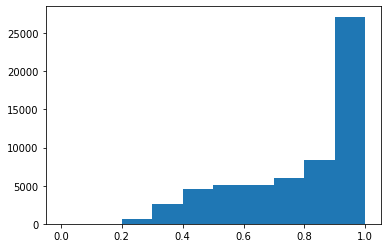

In [47]:
plt.hist(max_pred, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.show()

In [48]:
# more than 0.9 confidence
y_pred_high_confidence = []
new_y_not_labeled = []
arg_y_pred = np.argmax(y_pred, axis=1)
for i, arg in enumerate(arg_y_pred):
    if y_pred[i, arg] > 0.9:
        y_pred_high_confidence.append(arg)
        new_y_not_labeled.append(Y_not_labeled[i])
    else:
        y_pred_high_confidence.append(-1)
        new_y_not_labeled.append(-1)

In [49]:
print("accuracy on unseen data using predictions with high confidence : ",
      (np.sum(np.array(y_pred_high_confidence) == np.array(new_y_not_labeled)) / len(new_y_not_labeled))*100)

accuracy on unseen data using predictions with high confidence :  99.21344537815126


In [50]:
print(new_y_not_labeled[:10])
print(y_pred_high_confidence[:10])

[-1, -1, -1, -1, -1, 7, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, 7, -1, -1, -1, -1]


In [52]:
# number of new labeled data
nb_new_labeled = [1 if i>=0 else 0 for i in y_pred_high_confidence]
print("{} new labeled samples of {}".format(np.sum(nb_new_labeled), len(nb_new_labeled)))

27158 new labeled samples of 59500


### Repeat the process with the new labels (with high confidence) and manually label data with low confidence